In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Placement_Data_Full_Class.csv")

In [4]:
df.shape

(215, 15)

In [5]:
df.drop(columns='sl_no',inplace=True)

In [6]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [9]:
df.groupby("status")['salary'].mean()

status
Not Placed              NaN
Placed        288655.405405
Name: salary, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


C:\Users\kalid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kalid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


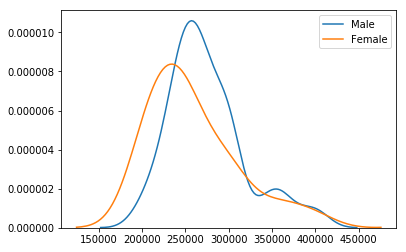

In [35]:
sns.kdeplot(df.salary[df['gender']=='M'])
sns.kdeplot(df.salary[df['gender']=='F'])
plt.legend(['Male','Female'])

In [32]:
df.loc[df['salary']>400000,:].index

Int64Index([4, 39, 53, 77, 95, 119, 150, 163, 174, 177], dtype='int64')

In [34]:
df.drop(index=[4,39,53,77,95,119,150,163,174,177],inplace=True)

In [36]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NaN


In [47]:
df['salary']=df['salary'].astype('str')

In [55]:
train=df.loc[df['salary']!='nan',:]

In [56]:
test=df.loc[df['salary']=='nan']

In [57]:
test.shape,train.shape

((67, 14), (138, 14))

In [58]:
train.salary=train.salary.astype('float')
test.salary=test.salary.astype('float')

C:\Users\kalid\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
test.reset_index(drop='index',inplace=True)

In [65]:
train.reset_index(drop='index',inplace=True)

In [67]:
train.drop(columns='status',inplace=True)
test.drop(columns='status',inplace=True)

C:\Users\kalid\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [90]:
y_train=train['salary']

In [91]:
X_train=train.iloc[:,:12]
X_test=test.iloc[:,:12]

In [81]:
from sklearn.preprocessing import StandardScaler

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [92]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)

In [94]:
lr=LinearRegression()

In [95]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
y_test=lr.predict(X_test)

In [115]:
y_test=y_test.round(0)

In [116]:
y_test

array([281679., 251068., 236438., 247799., 243065., 272483., 261387.,
       260861., 266839., 255613., 255256., 316428., 254998., 272218.,
       286128., 270193., 268010., 260071., 280835., 270795., 275187.,
       268431., 276692., 263848., 279382., 275462., 304473., 282727.,
       265413., 278908., 274856., 254541., 271857., 300369., 264032.,
       282439., 269038., 284731., 222878., 264144., 239941., 230353.,
       276424., 283951., 273346., 283784., 278898., 308011., 240207.,
       296707., 273621., 260871., 291694., 291042., 275761., 277958.,
       245981., 250300., 269177., 265513., 255369., 285215., 325639.,
       257336., 254367., 246263., 268824.])

In [120]:
df.salary[df['status']=='Not Placed']=y_test

C:\Users\kalid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
df.salary=df.salary.astype('float')

C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


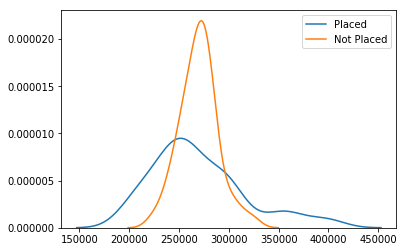

In [127]:
sns.kdeplot(df.salary[df['status']=='Placed'])
sns.kdeplot(df.salary[df['status']=='Not Placed'])
plt.legend(['Placed','Not Placed'])

In [128]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,281679.0
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,251068.0


## Median salaries of Placed and Non Placed People

In [133]:
df.groupby('status')['salary'].median()

status
Not Placed    270193.0
Placed        260000.0
Name: salary, dtype: float64

C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


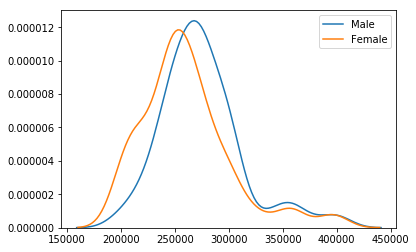

In [135]:
sns.kdeplot(df.salary[df['gender']=='M'])
sns.kdeplot(df.salary[df['gender']=='F'])
plt.legend(['Male','Female'])

In [136]:
df.isna().sum()

In [138]:
y=df['salary']

In [141]:
X=df.iloc[:,:13]

In [142]:
X.shape,y.shape

In [143]:
X=pd.get_dummies(X,drop_first=True)

In [137]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [146]:
lr=LinearRegression()
rf=RandomForestRegressor()

In [147]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [154]:
y_pred=lr.predict(X_test)
y_pred1=rf.predict(X_test)
y_predt=lr.predict(X_train)
y_predt1=rf.predict(X_train)

In [152]:
from sklearn.metrics import r2_score,mean_squared_error

In [153]:
print("Linear R: ",r2_score(y_pred,y_test))
print("Random F: ",r2_score(y_pred1,y_test))
print("MSE Linear R: ",mean_squared_error(y_pred,y_test))
print("MSE Random F: ",mean_squared_error(y_pred1,y_test))

Linear R:  -1.607926402760183
Random F:  -1.6795500940858568
MSE Linear R:  956774104.0891544
MSE Random F:  1257871581.4098382


C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


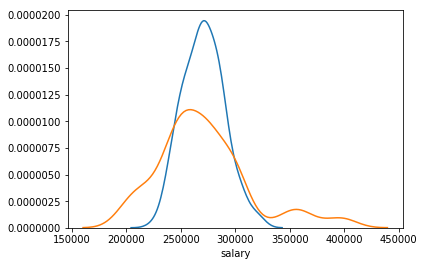

In [156]:
sns.distplot(y_predt,hist=False)
sns.distplot(y_train,hist=False)

C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


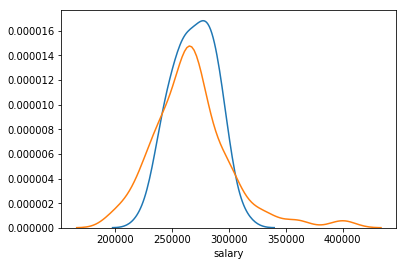

In [157]:
sns.distplot(y_pred,hist=False)
sns.distplot(y_test,hist=False)

In [159]:
d=pd.read_csv("Placement_Data_Full_Class.csv")

In [160]:
d.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [161]:
d.drop(columns='sl_no',inplace=True)

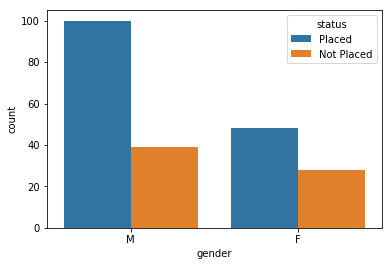

In [168]:
sns.countplot(d['gender'],hue=d['status'])

In [164]:
# there are more number of male students placed than the number of students that are not placed

C:\Users\kalid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kalid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


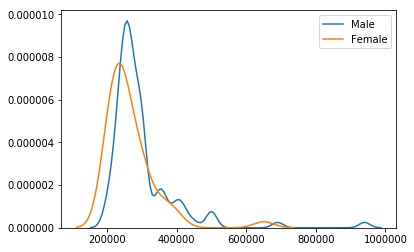

In [169]:
sns.kdeplot(d.salary[d['gender']=='M'])
sns.kdeplot(d.salary[d['gender']=='F'])
plt.legend(['Male','Female'])

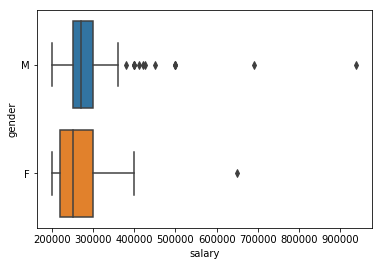

In [182]:
sns.boxplot(data=d,x='salary',y='gender')

In [184]:
###salaries for male has more number of outliers than female rows

In [185]:
###We should check the case with no outliers

In [186]:
###ssc_p Secondary education percentage and ssc board

In [187]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


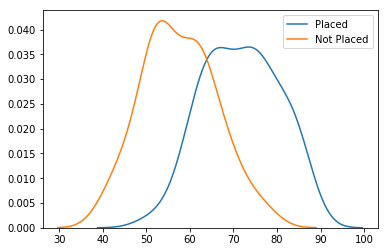

In [221]:
sns.kdeplot(d['ssc_p'][d['status']=='Placed'])
sns.kdeplot(d['ssc_p'][d['status']=='Not Placed'])
plt.legend(['Placed','Not Placed'])

In [197]:
d.groupby('status')['ssc_p'].median()

status
Not Placed    56.28
Placed        72.50
Name: ssc_p, dtype: float64

In [198]:
## For placed students, the ssc_p is higher than not placed students

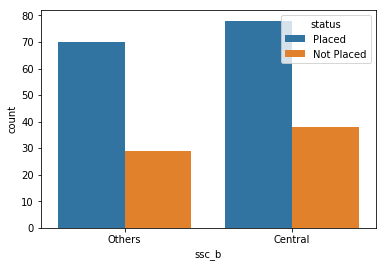

In [216]:
sns.countplot(data=d,x='ssc_b',hue='status')

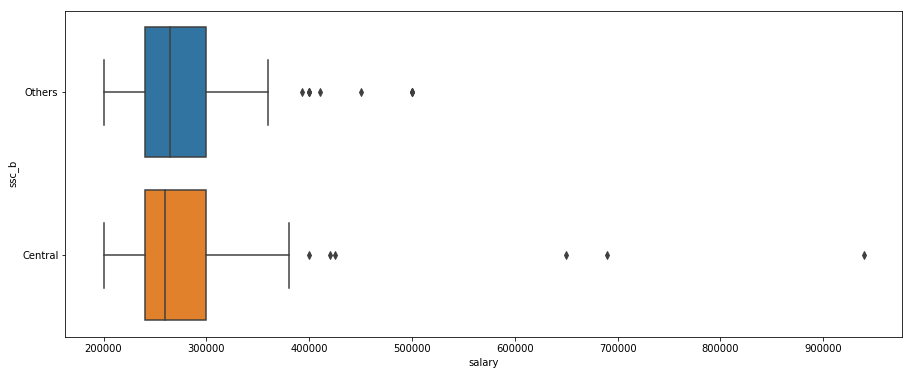

In [220]:
plt.figure(figsize=(15,6)),
sns.boxplot(data=d,x='salary',y='ssc_b')
plt.show()

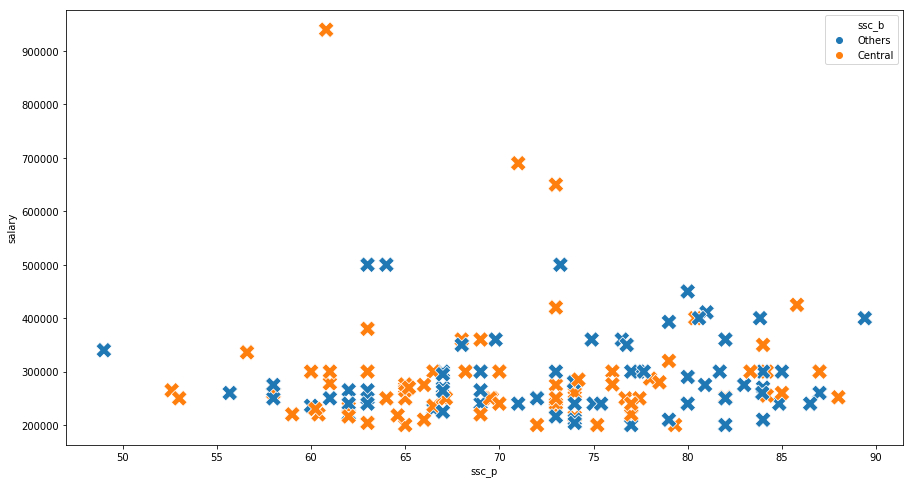

In [235]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=d,x='ssc_p',y='salary',marker='X',hue='ssc_b',s=250)
plt.show()

In [227]:
###There is no pattern in this so ssc_b can be ignored

In [202]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


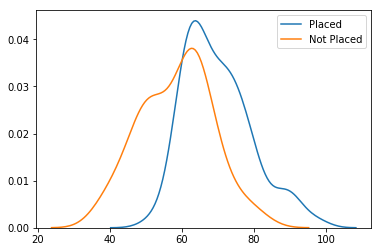

In [210]:
sns.kdeplot(d['hsc_p'][d['status']=='Placed'])
sns.kdeplot(d['hsc_p'][d['status']=='Not Placed'])
plt.legend(['Placed','Not Placed'])

In [212]:
d.groupby('status')['hsc_p'].median()

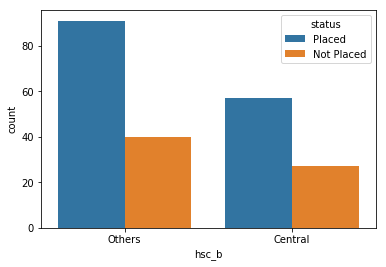

In [242]:
sns.countplot(data=d,x='hsc_b',hue='status')

In [243]:
##hsc_b doesnt matter much

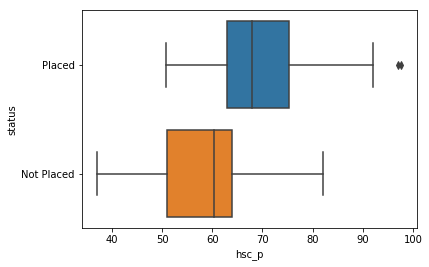

In [236]:
sns.boxplot(data=d,x='hsc_p',y='status')

In [213]:
##Here, When we compare the placed students with non placed students, Placed students have some what higher hsc_p than non placed

C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


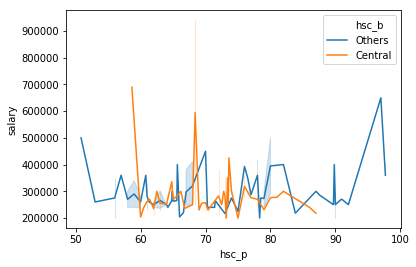

In [244]:
sns.lineplot(data=d,x='hsc_p',y='salary',hue='hsc_b')

In [245]:
##there is no pattern so hsc_b can be ignored

In [247]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


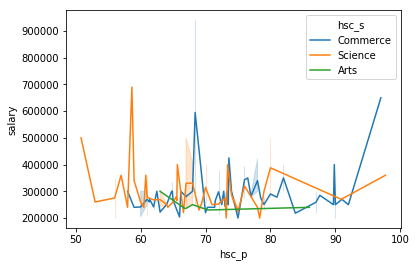

In [253]:
sns.lineplot(data=d,x='hsc_p',y='salary',hue='hsc_s')

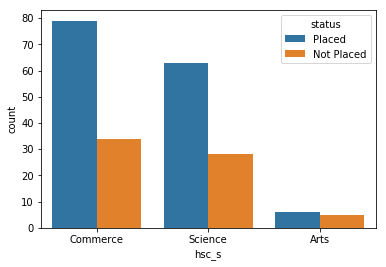

In [251]:
sns.countplot(data=d,x='hsc_s',hue='status')

In [254]:
#art students have comparitively low salary

In [255]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [271]:
d.loc[d['degree_t']=='Others']

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
34,M,62.0,Others,51.0,Others,Science,52.00,Others,No,68.44,Mkt&HR,62.77,Not Placed,NaN
42,M,49.0,Others,39.0,Central,Science,65.00,Others,No,63.00,Mkt&Fin,51.21,Not Placed,NaN
49,F,50.0,Others,37.0,Others,Arts,52.00,Others,No,65.00,Mkt&HR,56.11,Not Placed,NaN
87,M,59.6,Central,51.0,Central,Science,60.00,Others,No,75.00,Mkt&HR,59.08,Not Placed,NaN
124,M,67.0,Central,71.0,Central,Science,64.33,Others,Yes,64.00,Mkt&HR,61.26,Placed,250000.0
131,F,74.9,Others,57.0,Others,Science,62.00,Others,Yes,80.00,Mkt&Fin,60.78,Placed,360000.0
148,F,77.0,Central,86.0,Central,Arts,56.00,Others,No,57.00,Mkt&Fin,64.08,Placed,240000.0
182,M,52.0,Others,65.0,Others,Arts,57.00,Others,Yes,75.00,Mkt&Fin,59.81,Not Placed,NaN
185,F,88.0,Central,72.0,Central,Science,78.00,Others,No,82.00,Mkt&HR,71.43,Placed,252000.0
193,F,60.0,Central,63.0,Central,Arts,56.00,Others,Yes,80.00,Mkt&HR,56.63,Placed,300000.0


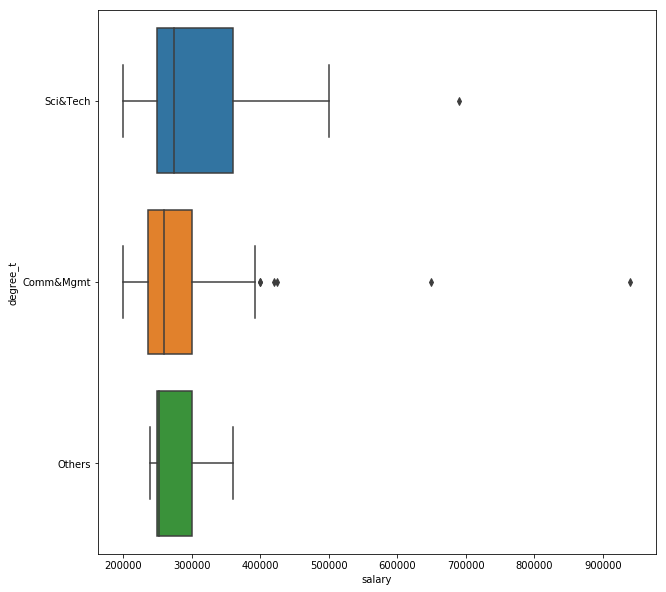

In [261]:
plt.figure(figsize=(10,10))
sns.boxplot(data=d,x='salary',y='degree_t')

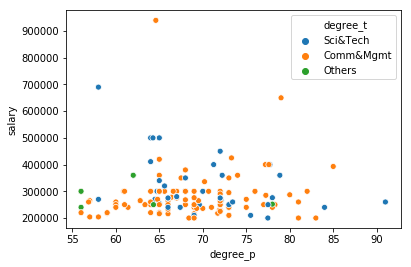

In [276]:
sns.scatterplot(data=d,x='degree_p',y='salary',hue='degree_t')

In [277]:
##there is no particular trend as such and but there are very less number of students with different background in degree##

In [278]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [279]:
#workex

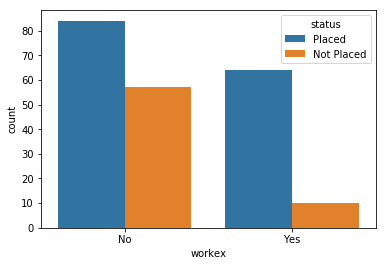

In [281]:
sns.countplot(data=d,x='workex',hue='status')

In [284]:
#$this effects placement

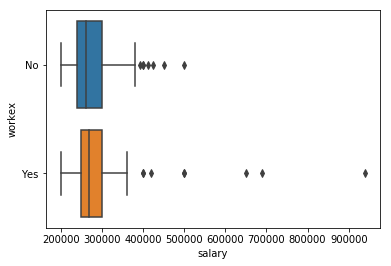

In [288]:

sns.boxplot(data=d,x='salary',y='workex')

C:\Users\kalid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kalid\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


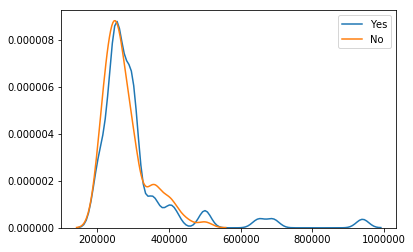

In [290]:
sns.kdeplot(d.salary[d['workex']=='Yes'])
sns.kdeplot(d.salary[d['workex']=='No'])
plt.legend(['Yes','No'])

In [292]:
#students get some amount of hgher salaries than expected when they have workex

In [293]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [294]:
#etest vs status

C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


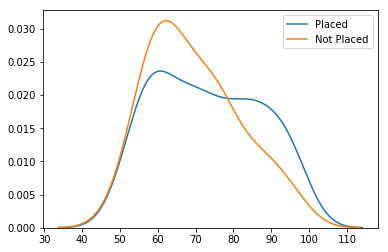

In [296]:
sns.kdeplot(d['etest_p'][d['status']=='Placed'])
sns.kdeplot(d['etest_p'][d['status']=='Not Placed'])
plt.legend(['Placed','Not Placed'])

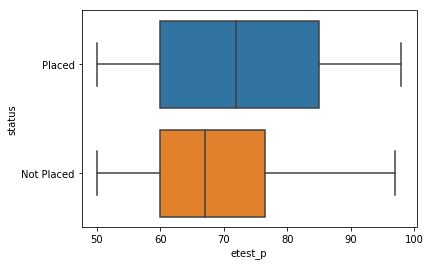

In [299]:
sns.boxplot(data=d,x='etest_p',y='status')

In [322]:
d.groupby('status')['etest_p'].mean()

status
Not Placed    69.587910
Placed        73.238041
Name: etest_p, dtype: float64

In [325]:
#etest vs salary

C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


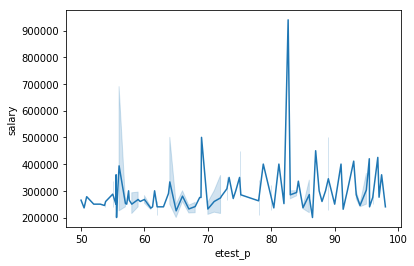

In [329]:
sns.lineplot(data=d,x='etest_p',y='salary')

In [330]:
##This factor doesn't affect the placements much

In [331]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [332]:
#specilization vs status

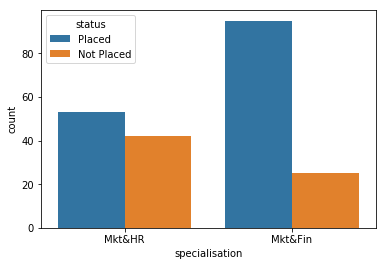

In [333]:
sns.countplot(data=d,x='specialisation',hue='status')

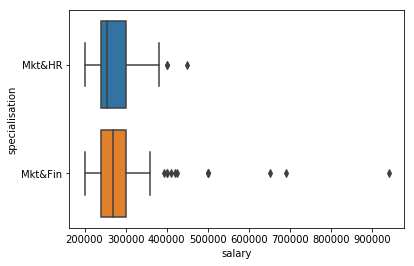

In [336]:
sns.boxplot(data=d,x='salary',y='specialisation')

In [338]:
d.groupby('specialisation')['salary'].median()

specialisation
Mkt&Fin    270000.0
Mkt&HR     255000.0
Name: salary, dtype: float64

In [339]:
##There are more number of students getting higher package  in MKT Fin than MKT HR

In [340]:
d.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [341]:
#mba_p vs status

In [342]:
#check whether as mba_p increases the salaries increase or not

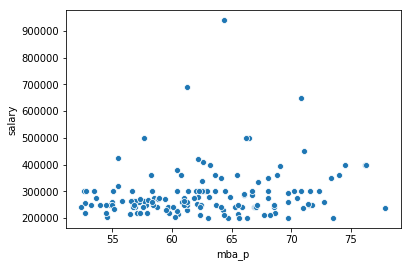

In [343]:
sns.scatterplot(data=d,x='mba_p',y='salary',hue)

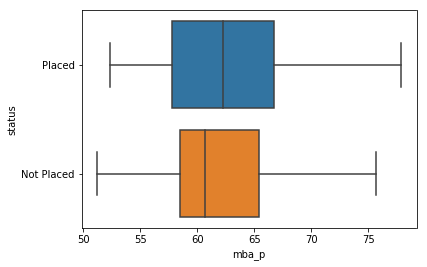

In [344]:
sns.boxplot(data=d,x='mba_p',y='status')

In [346]:
d.groupby('status')['mba_p'].median()

status
Not Placed    60.690
Placed        62.245
Name: mba_p, dtype: float64

C:\Users\kalid\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


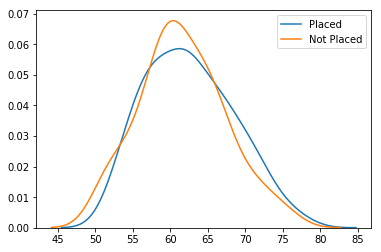

In [347]:
sns.kdeplot(d['mba_p'][d['status']=='Placed'])
sns.kdeplot(d['mba_p'][d['status']=='Not Placed'])
plt.legend(['Placed','Not Placed'])

In [349]:
###it also does nt affect sal much

In [353]:
d.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

## Feature Selection

In [355]:
d=d[['gender','ssc_p','hsc_p','hsc_s','degree_p','degree_t','specialisation','workex','etest_p','mba_p','salary','status']]

In [421]:
d.shape

(215, 12)

In [357]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
gender            215 non-null object
ssc_p             215 non-null float64
hsc_p             215 non-null float64
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
specialisation    215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
mba_p             215 non-null float64
salary            148 non-null float64
status            215 non-null object
dtypes: float64(6), object(6)
memory usage: 20.2+ KB


In [365]:
dc=d.copy()

In [366]:
dr=d.copy()

In [422]:
dr.shape

(215, 12)

In [360]:
#Lets go for classification problem of predicting whether is going to be placed or not

In [367]:
dc.drop(columns='salary',inplace=True)

In [389]:
dc['status']=dc['status'].map({'Placed':1,'Not Placed':0})

In [392]:
y=dc['status']

In [371]:
X=dc.iloc[:,:10]

In [372]:
X=pd.get_dummies(X,drop_first=True)

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [393]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [394]:
lr=LogisticRegression()

In [395]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [396]:
y_pred=lr.predict(X_test)

In [397]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [398]:
f1_score(y_pred,y_test)

0.8958333333333334

In [401]:
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.63      0.80      0.71        15
          1       0.93      0.86      0.90        50

avg / total       0.86      0.85      0.85        65



In [399]:
confusion_matrix(y_pred,y_test)

array([[12,  3],
       [ 7, 43]], dtype=int64)

In [414]:
f1s={}
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_test)
    f1s[i]=f1_score(y_pred1,y_test)

In [418]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)
f1_score(y_pred1,y_test)

0.8712871287128713

In [406]:
y_pred1=knn.predict(X_test)

In [407]:
f1_score(y_pred1,y_test)

0.845360824742268

In [420]:
dr.to_csv('Placement_regress.csv')

In [424]:
from sklearn.ensemble import GradientBoostingClassifier

In [425]:
gbc=GradientBoostingClassifier()

In [426]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [427]:
y_pred=gbc.predict(X_test)

In [428]:
f1_score(y_pred,y_test)

0.8631578947368421

In [429]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')